# Table of Contents
* 1. Import and review data  
    * 1.1 Import packages  
    * 1.2 Import data  
    * 1.3 Get overview of dataframe   
    * 1.4 Remove un-needed columns
* 2. Graph data  
    * 2.1 Target variable vs airline  
    * 2.2 Target variable vs origin location  
    * 2.3 Target variable vs time of year  
    * 2.4 Target variable vs time of day
* 3. Calculate Categorical associations  
    * 3.1 Adjust target variable column type  
    * 3.2 Run Chi Squared and Cramer's V tests  
        * 3.2.1 Five variables - departure hour, flight number, month, airline, and airport
        * 3.2.2 One variable - airport
        * 3.2.3 One variable - airline
        * 3.2.4 One variable - month
        * 3.2.5 One variable - hour
        * 3.2.6 One variable - flight number
   *  3.3 Merge data into new dataframe
    


# 1 Import and review data

1.1: Import packages

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

1.2 Import data

In [2]:
#confirm the disk location is correct for importing
os.chdir('C:/Users/steve/Documents/springboard/Capstone2/data')
cwd = os.getcwd()
print(cwd)

C:\Users\steve\Documents\springboard\Capstone2\data


In [3]:
#import data
df = pd.read_csv('clean_2018.csv')

1.3: Overview of data  
    Use .head() and .info() to get an overview of the data

In [4]:
df.head()

,Date,Airline,Flight_number,Origin,Dest,Planned_depart_time,Actual_depart_time,Dep_delay,Planned_arrival_time,Actual_arrival_time,...,Weather_delay,Nas_delay,Security_delay,Late_aircraft_delay,Airline_Name,Origin_Name,Origin_State,Dest_Name,Dest_State,Delayed_or_Cancelled
0,2018-01-01,UA,2429,EWR,DEN,15:17:00,15:12:00,-5.0,17:45:00,17:22:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Newark,NJ,Denver,CO,N
1,2018-01-01,UA,2427,LAS,SFO,11:15:00,11:07:00,-8.0,12:54:00,12:30:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Las Vegas,NV,San Francisco,CA,N
2,2018-01-01,UA,2426,SNA,DEN,13:35:00,13:30:00,-5.0,16:49:00,16:36:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Orange County,CA,Denver,CO,N
3,2018-01-01,UA,2425,RSW,ORD,15:46:00,15:52:00,6.0,17:56:00,17:54:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Fort Myers,FL,Chicago,IL,Y
4,2018-01-01,UA,2424,ORD,ALB,06:30:00,06:50:00,20.0,09:22:00,09:36:00,...,NaN,NaN,NaN,NaN,"United Airlines, Inc.",Chicago,IL,Albany,NY,Y


In [5]:
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191323 entries, 0 to 7191322
Data columns (total 25 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Date                  7191323 non-null  object 
 1   Airline               7191323 non-null  object 
 2   Flight_number         7191323 non-null  int64  
 3   Origin                7191323 non-null  object 
 4   Dest                  7191323 non-null  object 
 5   Planned_depart_time   7191323 non-null  object 
 6   Actual_depart_time    7079005 non-null  object 
 7   Dep_delay             7079005 non-null  float64
 8   Planned_arrival_time  7191323 non-null  object 
 9   Actual_arrival_time   7079005 non-null  object 
 10  Arrival_delay         7079005 non-null  float64
 11  Cancelled             7191323 non-null  float64
 12  Cancellation_code     112318 non-null   object 
 13  Distance              7191323 non-null  float64
 14  Carrier_delay         1352710 non-

1.4 Remove un-needed columns  


In [6]:
fi =df.drop(columns=['Planned_arrival_time', 'Actual_arrival_time', 'Arrival_delay', 'Cancellation_code', 'Carrier_delay',\
                     'Weather_delay', 'Nas_delay', 'Security_delay', 'Late_aircraft_delay'])

In [7]:
# Identify value counts of the target variable delayed or cancelled flights
fi['Delayed_or_Cancelled'].value_counts()

Delayed_or_Cancelled
N    4636512
Y    2554811
Name: count, dtype: int64

# 2: Graph data

2.1 Graph target variable (delayed/cancelled flights) vs airline

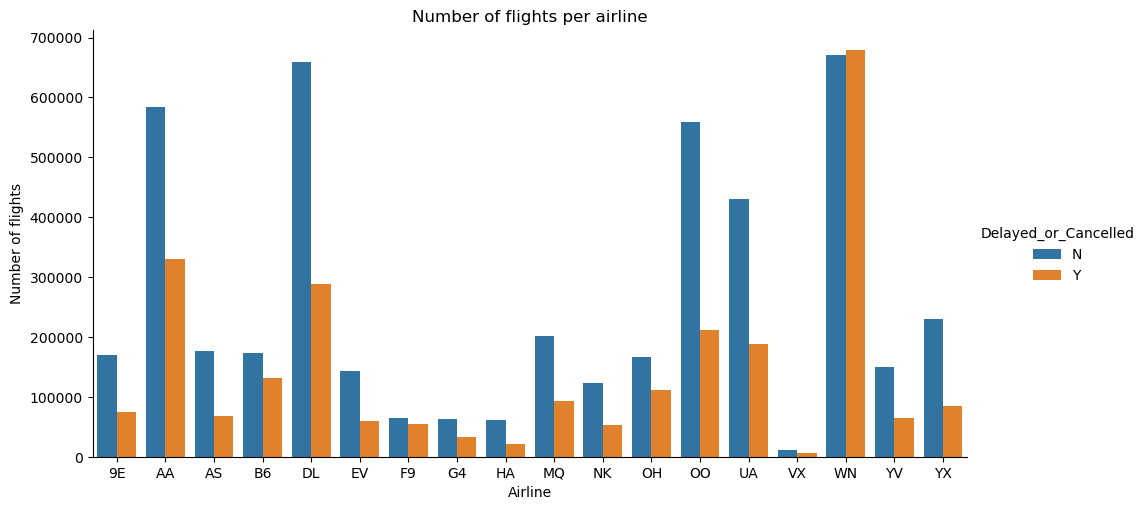

In [8]:
#create variable to sort airlines in alphabetical order
airlinefeat = sorted(fi['Airline'].unique())

#create graph of delayed/cancelled flights vs airline, ordered by the variable created above
sns.catplot(x='Airline', data=fi, kind='count', hue='Delayed_or_Cancelled', order = airlinefeat, aspect=2)
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('Airline')
plt.ylabel('Number of flights')
plt.title('Number of flights per airline')
plt.show()

In [9]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_airline = fi.groupby('Airline')['Delayed_or_Cancelled'].value_counts().unstack()
yn_airline['percent_Y'] = (yn_airline['Y'] / (yn_airline['N'] + yn_airline['Y'])) * 100
yn_airline['ratio_Y_to_N'] = yn_airline['Y'] / yn_airline['N']
yn_airline.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
Airline,,,,
WN,671058,678624,50.280288,1.011275
F9,64336,55409,46.272496,0.861244
B6,173362,130668,42.978653,0.753729
OH,166168,111158,40.082069,0.668949
AA,583489,330276,36.144523,0.566036
G4,62405,33517,34.941932,0.537088
VX,11807,5774,32.842273,0.489032
MQ,201751,92715,31.485808,0.459552
9E,169783,75331,30.733047,0.443690


Based on the above visual inspection and calculations, most airlines have a ratio of approximatly 50% or less delayed/cancelled flights compared to flights that take off on time. The notable exceptions are WN, with more delayed/cancelled flights than on time flights, and B6, F9, OH, which have a ratio greater than 60% of their flights. This means that for WN, over 50% of their flights are delayed/cancelled; for B6, F9, and OH, between 40%-46% of their flights are delayed/cancelled 

2.2 Graph target variable (delayed/cancelled flights) vs Origin location. Note that this is based on the state(and territories) that the flight departed from, not the specific airport. 

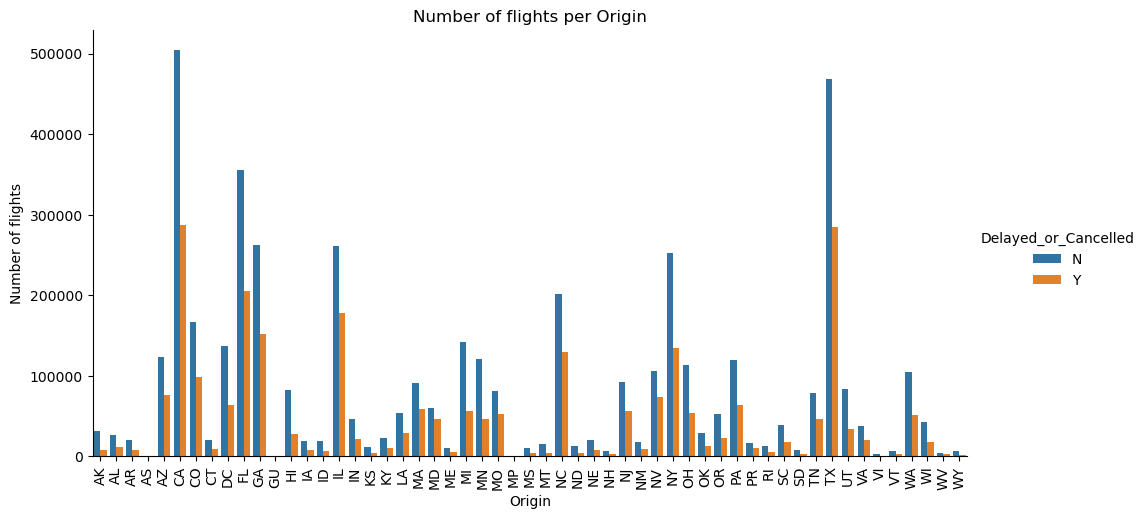

In [10]:
#create variable to sort origins in alphabetical order
originfeat = sorted(fi['Origin_State'].unique())

#create graph of delayed/cancelled flights vs origin, ordered by the variable created above
sns.catplot(x='Origin_State', data=fi, kind='count', hue='Delayed_or_Cancelled', order=originfeat, aspect=2)
plt.xticks(rotation='vertical')
plt.xlabel('Origin')
plt.ylabel('Number of flights')
plt.title('Number of flights per Origin')
plt.show()

In [11]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_state = fi.groupby('Origin_State')['Delayed_or_Cancelled'].value_counts().unstack()
yn_state['percent_Y'] = (yn_state['Y'] / (yn_state['N'] + yn_state['Y'])) * 100
yn_state['ratio_Y_to_N'] = yn_state['Y'] / yn_state['N']
yn_state.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
Origin_State,,,,
AS,64,58,47.540984,0.906250
MD,59812,46833,43.914858,0.783003
NV,106097,73365,40.880521,0.691490
IL,260830,177992,40.561321,0.682406
MO,81210,53126,39.547106,0.654181
NC,201116,130218,39.301128,0.647477
PR,16522,10682,39.266284,0.646532
MA,91550,58686,39.062542,0.641027
AZ,123910,75848,37.969944,0.612122


2.3 Graph target variable (delayed/cancelled flights) vs time of year (monthly)

In [12]:
#create column that extracts the month of each flight
fi['month'] = pd.to_datetime(fi['Date'])
fi['month'] = fi['month'].dt.month

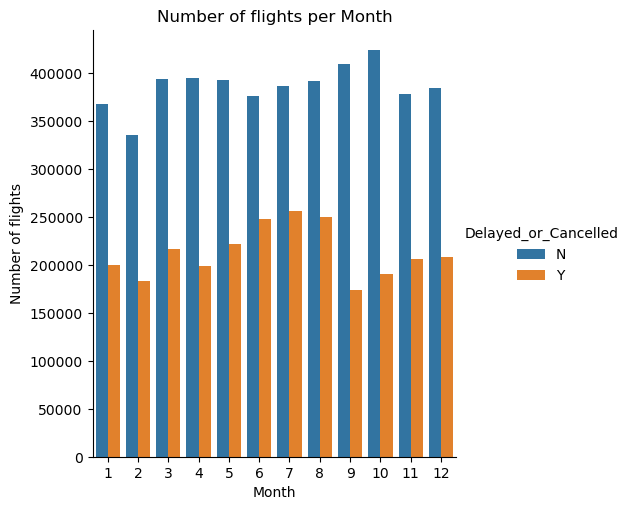

In [13]:
#create graph of delayed/cancelled flights vs time of year (by month).
sns.catplot(x='month', data=fi, kind='count', hue='Delayed_or_Cancelled')
plt.xlabel('Month')
plt.ylabel('Number of flights')
plt.title('Number of flights per Month')
plt.show()

In [14]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_month = fi.groupby('month')['Delayed_or_Cancelled'].value_counts().unstack()
yn_month['percent_Y'] = (yn_month['Y'] / (yn_month['N'] + yn_month['Y'])) * 100
yn_month['ratio_Y_to_N'] = yn_month['Y'] / yn_month['N']
yn_month.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
month,,,,
7,386589,256092,39.847452,0.662440
6,375729,248087,39.769259,0.660282
8,391881,250085,38.956113,0.638166
5,392801,221601,36.067754,0.564156
3,393923,216797,35.498592,0.550354
11,378241,206478,35.312347,0.545890
2,335790,183168,35.295342,0.545484
1,368304,200219,35.217397,0.543624
12,384144,208119,35.139625,0.541773


2.4 Graph target variable (delayed/cancelled flights) vs time of day (hourly)

In [15]:
#create column that extracts and rounds the flight time to the nearest hour

fi['hour_depart'] = pd.to_datetime(fi['Planned_depart_time'], format='%H:%M:%S')
fi['hour_depart'] = fi['hour_depart'].dt.round('H')

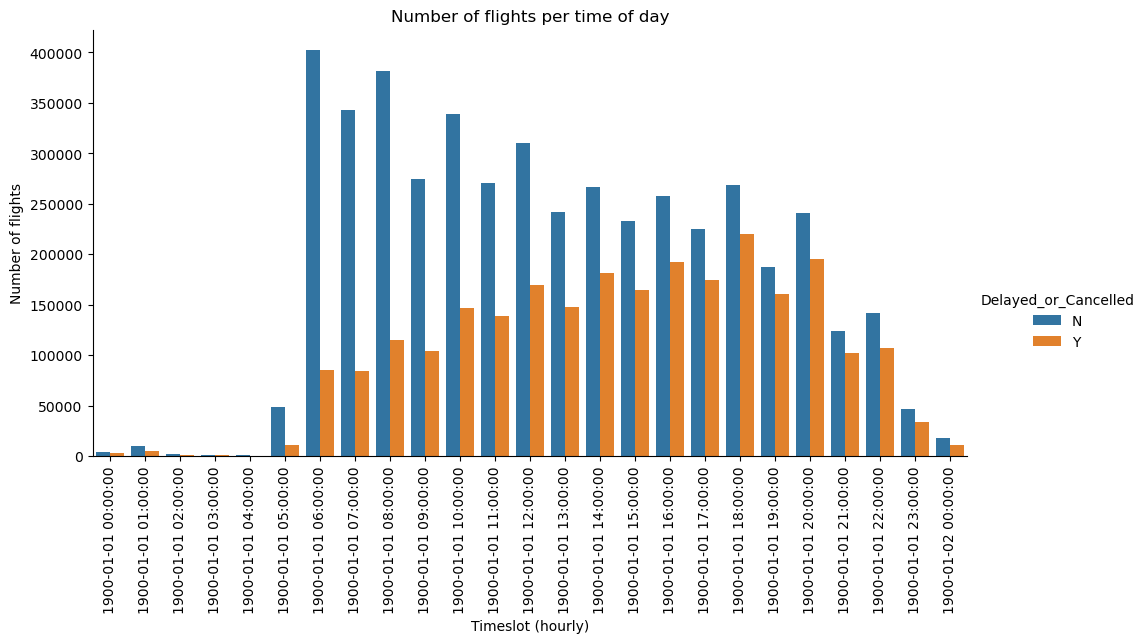

In [16]:
#create variable to sort hours in time order
timefeat=sorted(fi['hour_depart'].unique())

#create graph of delayed/cancelled flights vs time of day (by day), ordered by the variable above

sns.catplot(x='hour_depart', hue ='Delayed_or_Cancelled', data=fi, kind='count', aspect=2, order=timefeat)
plt.xticks(rotation='vertical')
plt.xlabel('Timeslot (hourly)')
plt.ylabel('Number of flights')
plt.title('Number of flights per time of day')
plt.show()

In [17]:
#calculate the percentage and ratio of delayed/cancelled flights.

yn_hour = fi.groupby('hour_depart')['Delayed_or_Cancelled'].value_counts().unstack()
yn_hour['percent_Y'] = (yn_hour['Y'] / (yn_hour['N'] + yn_hour['Y'])) * 100
yn_hour['ratio_Y_to_N'] = yn_hour['Y'] / yn_hour['N']
yn_hour.sort_values('percent_Y', ascending = False)

Delayed_or_Cancelled,N,Y,percent_Y,ratio_Y_to_N
hour_depart,,,,
1900-01-01 19:00:00,186934,160871,46.253217,0.860576
1900-01-01 21:00:00,123909,101647,45.065084,0.820336
1900-01-01 18:00:00,268118,219525,45.017564,0.818763
1900-01-01 20:00:00,240455,195324,44.821802,0.812310
1900-01-01 17:00:00,224952,174553,43.692319,0.775957
1900-01-01 03:00:00,988,764,43.607306,0.773279
1900-01-01 22:00:00,142206,107227,42.988297,0.754026
1900-01-01 16:00:00,257440,192460,42.778395,0.747592
1900-01-01 04:00:00,800,587,42.321557,0.733750


# 3. Calculate Categorical associations  


3.1 Adjust target variable column type  

In [18]:
#create a binary column for delayed/cancelled flights
fi['dcn']= fi['Delayed_or_Cancelled']
fi['dcn'].replace(to_replace='N', value= 0, inplace=True)
fi['dcn'].replace(to_replace='Y', value= 1, inplace=True)


3.2 Calculate Chi squared and Cramer's V

3.2.1 Five variables - departure hour, flight number, month, airline, and airport


In [19]:
#create table

contingency_table = pd.crosstab([fi['hour_depart'], fi['Flight_number'], fi['month'], fi['Airline'], fi['Origin']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# Define Cramer’s V
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * min_dim))

n = contingency_table.sum().sum()
min_dim = min(contingency_table.shape) - 1
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
combined = {'variable':'combined', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('combined')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

combined
Chi-Square Statistic: 1661306.2574989814
P-Value: 0.0
Cramér’s V: 0.48064059944369203


3.2.2 One variable - airport


In [20]:
#create table
tableOrigin = pd.crosstab([fi['Origin']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableOrigin)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
origin = {'variable':'origin', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('origin')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

origin
Chi-Square Statistic: 132095.82064439132
P-Value: 0.0
Cramér’s V: 0.13553146751105807


3.2.3 One variable - airline

In [21]:
#create table
tableAirline = pd.crosstab([fi['Airline']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableAirline)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
airline = {'variable':'airline', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}
print('airline')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

airline
Chi-Square Statistic: 216120.7393770501
P-Value: 0.0
Cramér’s V: 0.1733579746701739


3.2.4 One variable - month


In [22]:
#create table
tableMonth = pd.crosstab([fi['month']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableMonth)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
month = {'variable':'month', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('month')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

month
Chi-Square Statistic: 28338.13032546513
P-Value: 0.0
Cramér’s V: 0.0627742017463056


3.2.5 One variable - hour

In [23]:
#create table
tableHour = pd.crosstab([fi['hour_depart']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableHour)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
hour = {'variable':'hour', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('hour')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

hour
Chi-Square Statistic: 277479.3119349565
P-Value: 0.0
Cramér’s V: 0.19643139759873687


3.2.6 One variable - flight number

In [24]:
#create a column of unique airline flight numbers
fi['fnstring'] = fi['Flight_number'].astype(str)
fi['airflightnumber'] = fi['Airline'] + fi['fnstring']

#create table
tableFN = pd.crosstab([fi['airflightnumber']], fi['dcn'])

# Perform the chi-square test
chi2, p, dof, expected = stats.chi2_contingency(tableFN)
cramers_v_value = cramers_v(chi2, n, min_dim)

#Create dictionary of results to add to a dataframe
flightnumber = {'variable':'flightnumber', 'Chi-Square-Statistic':chi2, 'P-Value':p, 'Cramers-V':cramers_v_value}

print('flight number')
print(f"Chi-Square Statistic: {chi2}")
print(f"P-Value: {p}")
print(f"Cramér’s V: {cramers_v_value}")

flight number
Chi-Square Statistic: 523718.41068231507
P-Value: 0.0
Cramér’s V: 0.2698637324988604


3.3 Merge data into new dataframe


In [25]:
data = [combined, origin, airline, month, hour, flightnumber]
results = pd.DataFrame(data)
results.head(6)

,variable,Chi-Square-Statistic,P-Value,Cramers-V
0,combined,1.661306e+06,0.0,0.480641
1,origin,1.320958e+05,0.0,0.135531
2,airline,2.161207e+05,0.0,0.173358
3,month,2.833813e+04,0.0,0.062774
4,hour,2.774793e+05,0.0,0.196431
5,flightnumber,5.237184e+05,0.0,0.269864


Based on the above, flight delays and cancellations are affected by many factors, including the airline, time of day, time of month, and the location or take off. As flight number are unique to airline, time of day, and location, this 1 feature has the biggest impact on whether a flight will be delayed or cancelled.